In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm

/Users/jimmydoran/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


            Apple_Price
Date                   
2020-01-06   298.282715
2020-01-07   296.879883
2020-01-08   301.655548
2020-01-09   308.062988
2020-01-10   308.759399


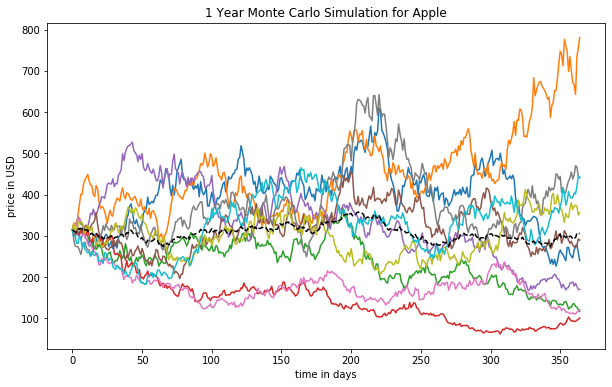

<Figure size 432x288 with 0 Axes>

In [5]:
def get_simulation(ticker,name,intervals):
    #get data of the stock, taking in ticker and name. will store in df, with Date and ticker as the columns
    data = pd.DataFrame()
    data[name + '_Price'] = wb.DataReader(ticker,data_source = 'yahoo', start = '2020-01-05')['Adj Close']
    print(data.head())
        
    log_returns = np.log(1+data.pct_change())#log returns used to account for compounding returns
    
    u = log_returns.mean()#mu
    var = log_returns.var()
    
    drift = u-(.5*var)#change in average value over time
    stdev = log_returns.std()
    
    t_intervals = intervals#number of days 
    iterations = 10 #number of 'trials'
    
    daily_returns = np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))
    s0 = data.iloc[-1]
    
    price_list = np.zeros_like(daily_returns)
    price_list[0] = s0
    
    for t in range(1,t_intervals):
        price_list[t]=price_list[t-1] * daily_returns[t]
    
    price_mean = (price_list.mean(axis=1))
    
    plt.figure(figsize = (10,6))
    plt.title('1 Year Monte Carlo Simulation for '+ name)
    plt.ylabel("price in USD")
    plt.xlabel('time in days')
    plt.plot(price_list)
    plt.plot(price_mean,'r--', color = 'black')
        
    plt.show()
    plt.savefig('aaple.png')
    plt.show()

#get_simulation('AAPL', 'Apple',21)
get_simulation('AAPL', 'Apple',365)

In [8]:
ls

Untitled.ipynb  aaple.png
